In [14]:
import numpy as np
from utils.imutils import displayImage
import cv2

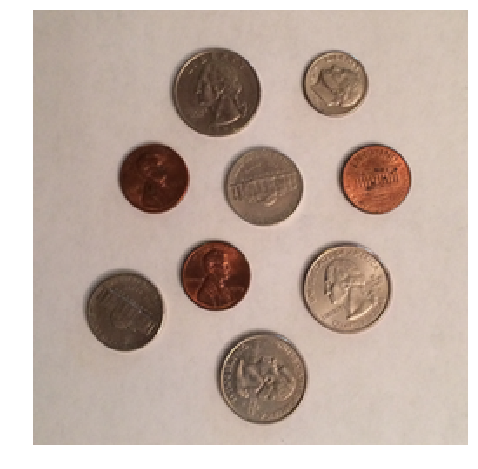

In [15]:
image = cv2.imread('images/coins.png')
displayImage(image)

## Thresholding
Thresholding is the binarization of an image where pixels with values greater than T are set to 255 and all others are set to 0

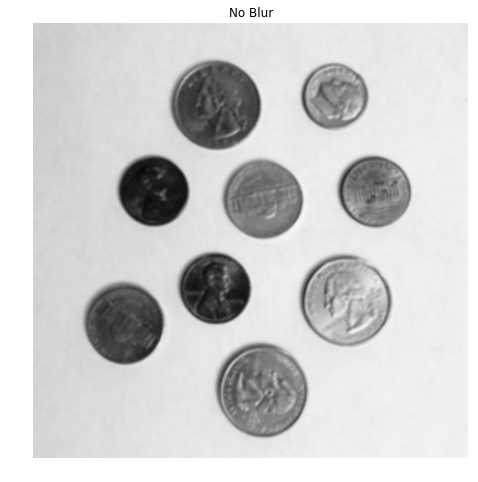

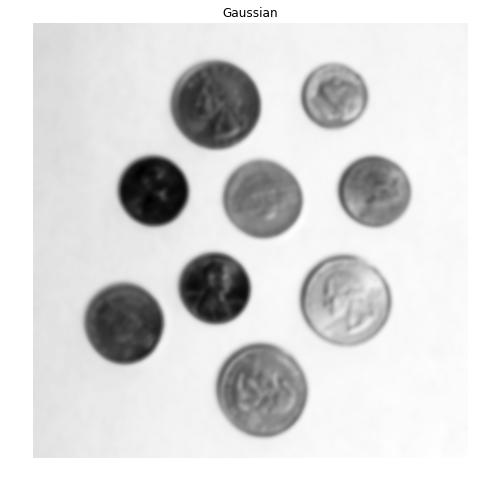

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# we apply blurr to remove some of the edges like he faces bevel on coins
blurred = cv2.GaussianBlur(gray, (5,5), 0)
displayImage(gray, title='No Blur')
displayImage(blurred, title='Gaussian')

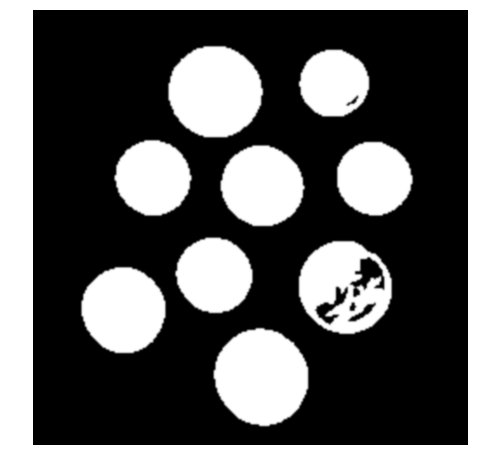

In [17]:
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
displayImage(threshInv)

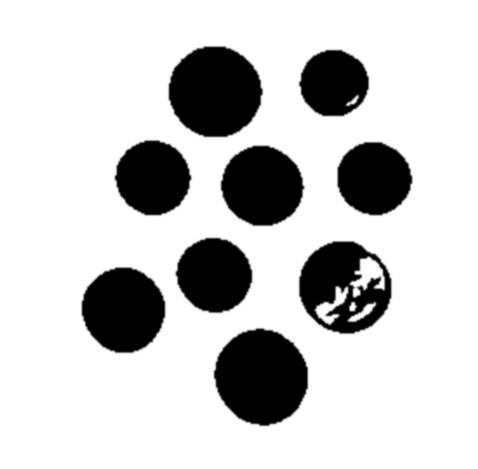

In [18]:
# we can invert it by changing the last parameter
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
displayImage(thresh)

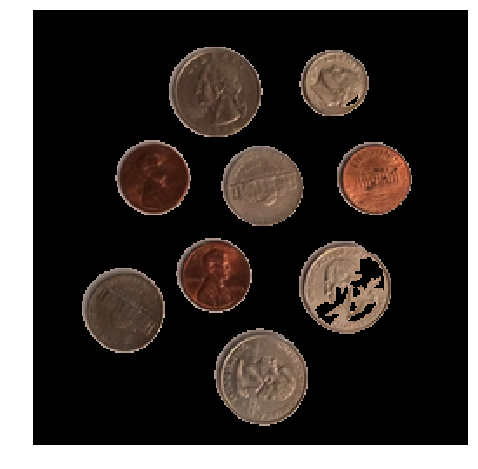

In [19]:
# now we can use our threshold image as a mask to view only coins
displayImage(cv2.bitwise_and(image, image, mask = threshInv))

## Adaptive Thresholding
In simple thresholding we have to supply the value of T. Adaptive thresholding examines a neighborhood of pixels and adaptively apply thresholding to each neighborhood. In thie example we'll use the mean value of an read of 11 pixels and use that as our T value

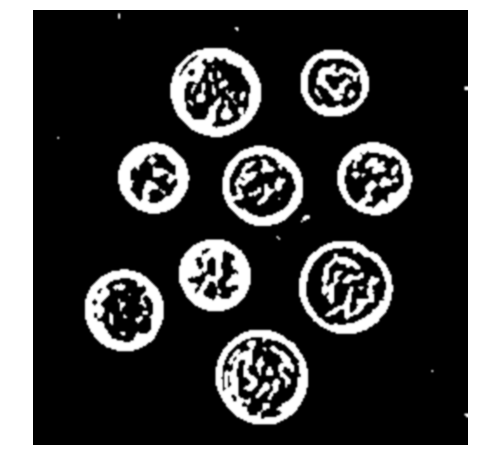

In [20]:
image = cv2.imread('images/coins.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# last value is C and it subtracts from the mean. It's an adjustable parameter
thresh = cv2.adaptiveThreshold(blurred, 255,
                               cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
displayImage(thresh)

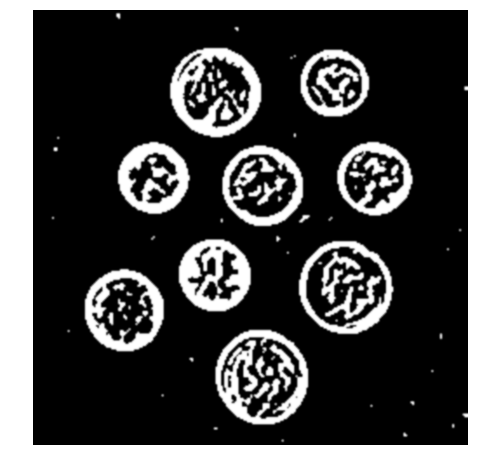

In [21]:
# We can also apply Gaussian thresholding in the same manner
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
displayImage(thresh)

## OTSU

In [22]:
import mahotas

image = cv2.imread('images/coins.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))

Otsu's threshold: 137


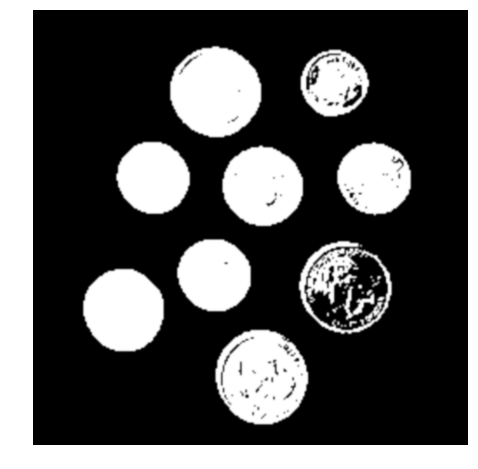

In [23]:
# Applying the threshold can be done using NumPy, where values
# smaller than the threshold are set to zero, and values above
# the threshold are set to 255 (white).

thresh = gray.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
displayImage(thresh)

Riddler-Calvard: 137.799281092233


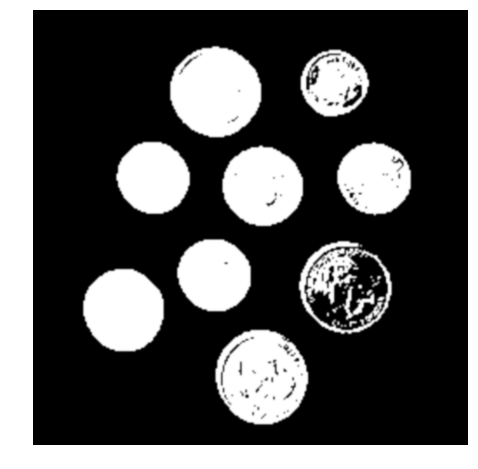

In [24]:
# An alternative is to use the Riddler-Calvard method
T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard: {}".format(T))
thresh = gray.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
displayImage(thresh)